In [ ]:
# importação dos dados
import pandas as pd
df = pd.read_excel("dados_fluidos_v2.xlsx")
df

,id,viscosidade,densidade,taxa_deformacao,tipo_produto,classe
0,0,0.891437,1055.887828,53.760168,cosmético,newtoniano
1,1,1.099735,1025.051762,50.348204,alimentício,newtoniano
2,2,1.028298,979.526472,48.672772,industrial,newtoniano
3,3,0.849371,949.238428,54.647922,alimentício,newtoniano
4,4,0.942140,1022.280587,56.304106,alimentício,newtoniano
...,...,...,...,...,...,...
475,475,1.169168,1002.524532,81.193080,industrial,nao-newtoniano
476,476,1.032596,1066.506783,44.728899,industrial,nao-newtoniano
477,477,0.980395,1024.699725,69.290020,cosmético,nao-newtoniano
478,478,1.593216,1065.067566,46.185497,cosmético,nao-newtoniano


In [ ]:
# remover a coluna "id":
df = df.drop(columns=['id'])
df

,viscosidade,densidade,taxa_deformacao,tipo_produto,classe
0,0.891437,1055.887828,53.760168,cosmético,newtoniano
1,1.099735,1025.051762,50.348204,alimentício,newtoniano
2,1.028298,979.526472,48.672772,industrial,newtoniano
3,0.849371,949.238428,54.647922,alimentício,newtoniano
4,0.942140,1022.280587,56.304106,alimentício,newtoniano
...,...,...,...,...,...
475,1.169168,1002.524532,81.193080,industrial,nao-newtoniano
476,1.032596,1066.506783,44.728899,industrial,nao-newtoniano
477,0.980395,1024.699725,69.290020,cosmético,nao-newtoniano
478,1.593216,1065.067566,46.185497,cosmético,nao-newtoniano


In [ ]:
# informações do dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   viscosidade      480 non-null    float64
 1   densidade        480 non-null    float64
 2   taxa_deformacao  480 non-null    float64
 3   tipo_produto     480 non-null    object 
 4   classe           480 non-null    object 
dtypes: float64(3), object(2)
memory usage: 18.9+ KB


In [ ]:
# analisando a estatística descritiva dos dados:
df.describe()

,viscosidade,densidade,taxa_deformacao
count,480.000000,480.000000,480.000000
mean,0.968033,1022.845454,50.585736
std,0.291184,42.878851,9.567246
min,-0.266822,921.056859,17.608375
25%,0.863619,990.812204,45.925381
50%,0.985720,1020.244185,50.708851
75%,1.095426,1055.186617,55.527540
max,2.106641,1152.235778,84.065507


In [ ]:
# substituindo textos por números:
df = df.replace({
    'cosmético': 1, 'alimentício': 2, 'industrial': 3,
    'newtoniano': 1, 'nao-newtoniano': 0
})
df

/tmp/ipython-input-273625747.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({


,viscosidade,densidade,taxa_deformacao,tipo_produto,classe
0,0.891437,1055.887828,53.760168,1,1
1,1.099735,1025.051762,50.348204,2,1
2,1.028298,979.526472,48.672772,3,1
3,0.849371,949.238428,54.647922,2,1
4,0.942140,1022.280587,56.304106,2,1
...,...,...,...,...,...
475,1.169168,1002.524532,81.193080,3,0
476,1.032596,1066.506783,44.728899,3,0
477,0.980395,1024.699725,69.290020,1,0
478,1.593216,1065.067566,46.185497,1,0


In [ ]:
# convertendo a coluna "tipo_produto " em três outras colunas
# (one hot encoding):
df = pd.get_dummies(df, columns=['tipo_produto'])
df = df.replace({
    True: 1, False: 0
})
df
# clicar no botão "Executar tudo"

/tmp/ipython-input-966512837.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({


,viscosidade,densidade,taxa_deformacao,classe,tipo_produto_1,tipo_produto_2,tipo_produto_3
0,0.891437,1055.887828,53.760168,1,1,0,0
1,1.099735,1025.051762,50.348204,1,0,1,0
2,1.028298,979.526472,48.672772,1,0,0,1
3,0.849371,949.238428,54.647922,1,0,1,0
4,0.942140,1022.280587,56.304106,1,0,1,0
...,...,...,...,...,...,...,...
475,1.169168,1002.524532,81.193080,0,0,0,1
476,1.032596,1066.506783,44.728899,0,0,0,1
477,0.980395,1024.699725,69.290020,0,1,0,0
478,1.593216,1065.067566,46.185497,0,1,0,0


In [ ]:
#separar dados de treino (70%) e de teste (30%) de forma estratificada:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['classe'])
y = df['classe']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state=42,
                                                    test_size=0.3,
                                                    stratify=y)
# atestando a estratificação:
print(f'Média de treino: {y_treino.mean()}')
print(f'Média de teste: {y_teste.mean()}')

Média de treino: 0.5208333333333334
Média de teste: 0.5208333333333334


In [ ]:
# criação dos modelos de classificação:
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble

modelo_rl = linear_model.LogisticRegression(penalty=None, fit_intercept=True)
modelo_nb = naive_bayes.GaussianNB()
modelo_ad = tree.DecisionTreeClassifier(random_state=42, max_depth=5)
modelo_rf = ensemble.RandomForestClassifier(random_state=42, max_depth=5)

# treino dos modelos:
modelo_rl.fit(X_treino, y_treino)
modelo_nb.fit(X_treino, y_treino)
modelo_ad.fit(X_treino, y_treino)
modelo_rf.fit(X_treino, y_treino)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
# previsões usando os modelos treinados e dados de teste:
y_rl = modelo_rl.predict(X_teste)
y_nb = modelo_nb.predict(X_teste)
y_ad = modelo_ad.predict(X_teste)
y_rf = modelo_rf.predict(X_teste)

y_proba_rl = modelo_rl.predict_proba(X_teste)[:,1]
y_proba_nb = modelo_nb.predict_proba(X_teste)[:,1]
y_proba_ad = modelo_ad.predict_proba(X_teste)[:,1]
y_proba_rf = modelo_rf.predict_proba(X_teste)[:,1]


In [ ]:
# MOSTRAR MATRIZ DE CONFUSÃO PARA CADA MODELO:
from sklearn import metrics
print('Regressão logística:')
print(metrics.confusion_matrix(y_teste, y_rl))
print('Naive Bayes:')
print(metrics.confusion_matrix(y_teste, y_nb))
print('Árvore de decisão:')
print(metrics.confusion_matrix(y_teste, y_ad))
print('Random forest:')
print(metrics.confusion_matrix(y_teste, y_rf))

Regressão logística:
[[51 18]
 [18 57]]
Naive Bayes:
[[62  7]
 [ 6 69]]
Árvore de decisão:
[[59 10]
 [ 5 70]]
Random forest:
[[60  9]
 [ 7 68]]


In [ ]:
# métricas de ajuste:
from sklearn import metrics
# acurácia:
ac_rl = metrics.accuracy_score(y_teste, y_rl)
ac_nb = metrics.accuracy_score(y_teste, y_nb)
ac_ad = metrics.accuracy_score(y_teste, y_ad)
ac_rf = metrics.accuracy_score(y_teste, y_rf)
# precisão:
pr_rl = metrics.precision_score(y_teste, y_rl)
pr_nb = metrics.precision_score(y_teste, y_nb)
pr_ad = metrics.precision_score(y_teste, y_ad)
pr_rf = metrics.precision_score(y_teste, y_rf)
# recall (sendibilidade):
rc_rl = metrics.recall_score(y_teste, y_rl)
rc_nb = metrics.recall_score(y_teste, y_nb)
rc_ad = metrics.recall_score(y_teste, y_ad)
rc_rf = metrics.recall_score(y_teste, y_rf)
#ROC:
roc_rl = metrics.roc_curve(y_teste, y_proba_rl)
roc_nb = metrics.roc_curve(y_teste, y_proba_nb)
roc_ad = metrics.roc_curve(y_teste, y_proba_ad)
roc_rf = metrics.roc_curve(y_teste, y_proba_rf)
# area under curve (AUC):
auc_rl = metrics.roc_auc_score(y_teste, y_proba_rl)
auc_nb = metrics.roc_auc_score(y_teste, y_proba_nb)
auc_ad = metrics.roc_auc_score(y_teste, y_proba_ad)
auc_rf = metrics.roc_auc_score(y_teste, y_proba_rf)

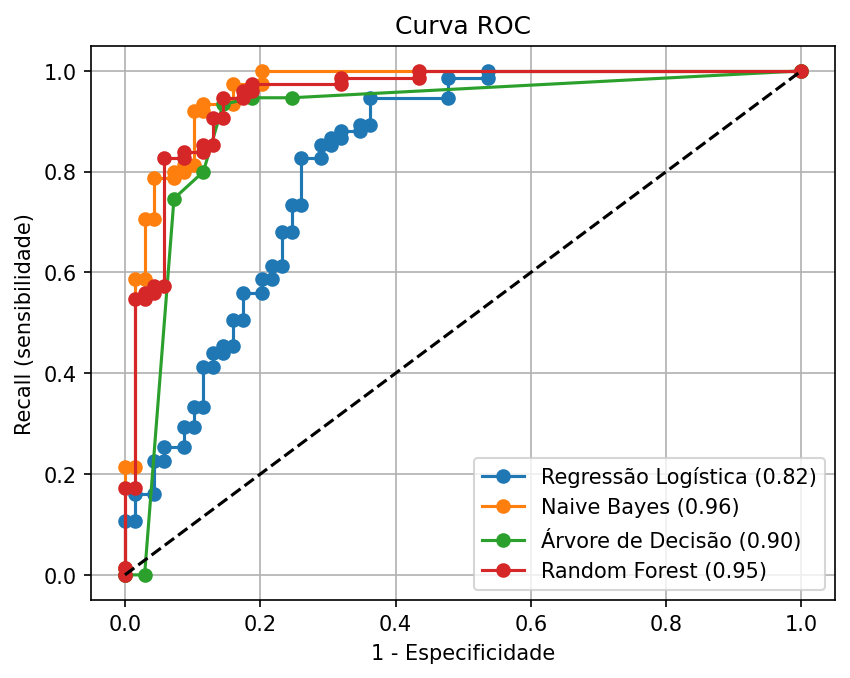

In [ ]:
# plotando a curva ROC
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.plot(roc_rl[0], roc_rl[1], 'o-')
plt.plot(roc_nb[0], roc_nb[1], 'o-')
plt.plot(roc_ad[0], roc_ad[1], 'o-')
plt.plot(roc_rf[0], roc_rf[1], 'o-')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('1 - Especificidade')
plt.ylabel('Recall (sensibilidade)')
plt.legend([f'Regressão Logística ({auc_rl:.2f})',
            f'Naive Bayes ({auc_nb:.2f})',
            f'Árvore de Decisão ({auc_ad:.2f})',
            f'Random Forest ({auc_rf:.2f})'])
plt.grid(True)
plt.title('Curva ROC')
plt.show()